In [1]:
import sys 
sys.path.append('..')

In [2]:
import electrode2currentmap as e2cm
from importlib import reload
reload(e2cm)

<module 'electrode2currentmap' from '../electrode2currentmap.py'>

In [3]:
!rm axon.npz

In [4]:
r = e2cm.Retina(axon_map='axon.npz')

Can't find file axon.npz, generating


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

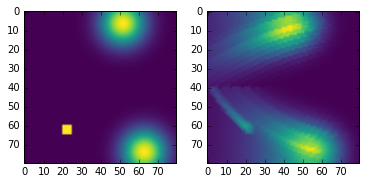

In [6]:
# made-up current map
xg = e2cm.micron2deg(r.gridx)
yg = e2cm.micron2deg(r.gridy)

cm = np.exp(-((xg-1)**2+(yg+3)**2)/1)
cm[60:65,20:25]= 1

cm[50:60,80:90]= 1
cm = cm + np.exp(-((xg-2)**2+(yg-3)**2)/1)

# show the currrent map as an image
plt.subplot(1,2,1)
plt.imshow(cm,cmap = 'viridis')

# pass the current map through the axon map
ecm = r.cm2ecm(cm)
plt.subplot(1,2,2)
plt.imshow(ecm, cmap = 'viridis')


In [13]:
r.gridy.shape

(80, 80)

In [8]:
xlo = -100 
xhi = 100
ylo= -150
yhi= 150
sampling = 3

In [14]:
xg1, yg1 = [x.T for x in np.meshgrid(np.arange(xlo, xhi,sampling),
                       np.arange(ylo, yhi,sampling),
                       indexing='ij')]

xg2, yg2 = np.meshgrid(np.arange(xlo, xhi,sampling),
                       np.arange(ylo, yhi,sampling),
                       indexing='xy')

In [20]:
xg1[0], yg1[:, 0]

(array([-100,  -97,  -94,  -91,  -88,  -85,  -82,  -79,  -76,  -73,  -70,
         -67,  -64,  -61,  -58,  -55,  -52,  -49,  -46,  -43,  -40,  -37,
         -34,  -31,  -28,  -25,  -22,  -19,  -16,  -13,  -10,   -7,   -4,
          -1,    2,    5,    8,   11,   14,   17,   20,   23,   26,   29,
          32,   35,   38,   41,   44,   47,   50,   53,   56,   59,   62,
          65,   68,   71,   74,   77,   80,   83,   86,   89,   92,   95,
          98]),
 array([-150, -147, -144, -141, -138, -135, -132, -129, -126, -123, -120,
        -117, -114, -111, -108, -105, -102,  -99,  -96,  -93,  -90,  -87,
         -84,  -81,  -78,  -75,  -72,  -69,  -66,  -63,  -60,  -57,  -54,
         -51,  -48,  -45,  -42,  -39,  -36,  -33,  -30,  -27,  -24,  -21,
         -18,  -15,  -12,   -9,   -6,   -3,    0,    3,    6,    9,   12,
          15,   18,   21,   24,   27,   30,   33,   36,   39,   42,   45,
          48,   51,   54,   57,   60,   63,   66,   69,   72,   75,   78,
          81,   84,   

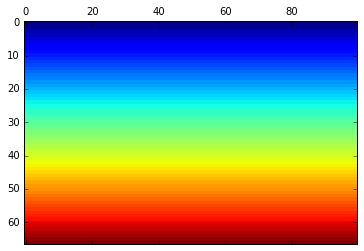

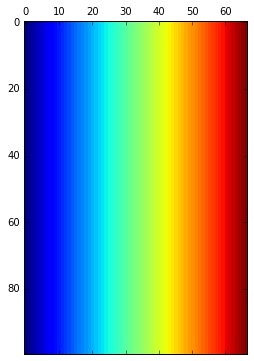

In [11]:
plt.matshow(xg1)
plt.matshow(xg2)